# 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [13]:
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 불러오기

In [3]:
path = 'C:/Users/tkdal/Desktop/covid19/dataset/'

case = p_info = pd.read_csv(path+'Case.csv')
p_info = pd.read_csv(path+'PatientInfo.csv')
p_route = pd.read_csv(path+'PatientRoute.csv')
time = pd.read_csv(path+'Time.csv')
t_age = pd.read_csv(path+'TimeAge.csv')
t_gender = pd.read_csv(path+'TimeGender.csv')
t_provin = pd.read_csv(path+'TimeProvince.csv')
region = pd.read_csv(path+'Region.csv')
weather = pd.read_csv(path+'Weather.csv')
search = pd.read_csv(path+'SearchTrend.csv')

# case csv 살펴보기

In [27]:
# case csv의 정보

'''
1. case_id(7) - region_code(5)(region) + case_number(2)
2. province - 특별시, 광역시, 도
3. city - 시, 군, 구(from other city = 다른도시에서 시작함)
4. group - true = infection_case의 명칭이 정확한 것,
False는 contact with patient, overseas inflow, etc처럼 그룹이 아닌 경우
5. infection_case - overseas inflow는 다른나라에서 감염되어 들어온 것,
etc는 개인감염, 조사후 분류진행중, 조사중인 경우
6. confirmed - 확진자 수
7. latitude - group의 위도
8. longitude - group의 경도
'''
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [15]:
# case 데이터프레임의 행과 열 갯수
case.shape

(81, 8)

In [16]:
# case 데이터프레임의 정보(데이터타입, 메모리 등)
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
case_id           81 non-null int64
province          81 non-null object
city              81 non-null object
group             81 non-null bool
infection_case    81 non-null object
confirmed         81 non-null int64
latitude          81 non-null object
longitude         81 non-null object
dtypes: bool(1), int64(2), object(5)
memory usage: 4.6+ KB


In [29]:
# case 데이터프레임의 결측치 -> '-'로 표시됨
# case.isnull().sum()
case

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
...,...,...,...,...,...,...,...,...
76,6100004,Gyeongsangnam-do,Changwon-si,True,Hanmaeum Changwon Hospital,7,35.22115,128.6866
77,6100005,Gyeongsangnam-do,Changnyeong-gun,True,Changnyeong Coin Karaoke,7,35.54127,128.5008
78,6100006,Gyeongsangnam-do,from other city,True,Onchun Church,2,-,-
79,6100007,Gyeongsangnam-do,-,False,etc,19,-,-


# case csv 각 column별 정보

In [21]:
# case_id 컬럼의 값들 합계 확인
case['case_id'].value_counts() # 1500003 얘 뭔데 2냐?

1500003    2
6000005    1
4100001    1
1300001    1
1300002    1
          ..
1600001    1
1400002    1
6100002    1
1400001    1
1200001    1
Name: case_id, Length: 80, dtype: int64

In [11]:
# province 컬럼의 값들 합계 확인
case['province'].value_counts()

Gyeongsangbuk-do     9
Seoul                8
Gyeonggi-do          7
Busan                7
Gyeongsangnam-do     7
Incheon              5
Gwangju              4
Chungcheongbuk-do    4
Daegu                4
Jeollanam-do         4
Daejeon              4
Sejong               4
Jeollabuk-do         4
Chungcheongnam-do    3
Gangwon-do           3
Ulsan                3
Jeju-do              1
Name: province, dtype: int64

In [10]:
# city 컬럼의 값들 합계 확인
case['city'].value_counts() # from other city이거 이해안됨

-                  30
from other city    22
Gyeongsan-si        3
Seongnam-si         2
Geochang-gun        2
Cheongdo-gun        1
Seongdong-gu        1
Jongno-gu           1
Eojin-dong          1
Jin-gu              1
Haeundae-gu         1
Changwon-si         1
Dongdaemun-gu       1
Dongnae-gu          1
Eunpyeong-gu        1
Jung-gu             1
Chilgok-gun         1
Suwon-si            1
Cheonan-si          1
Changnyeong-gun     1
Nam-gu              1
Suyeong-gu          1
Goesan-gun          1
Guro-gu             1
Bonghwa-gun         1
Seosan-si           1
Boram-dong          1
Name: city, dtype: int64

In [12]:
# group 컬럼의 값들 합계 확인
case['group'].value_counts()

True     51
False    30
Name: group, dtype: int64

In [33]:
# confirmed 컬럼의 값들 합계 확인
case['confirmed'].value_counts()

1       11
6        7
2        7
8        6
10       5
4        5
7        3
3        3
32       3
28       2
16       2
22       2
19       2
5        1
649      1
18       1
11       1
13       1
14       1
17       1
119      1
517      1
24       1
25       1
34       1
1056     1
47       1
49       1
4359     1
58       1
65       1
322      1
79       1
9        1
104      1
20       1
Name: confirmed, dtype: int64

In [62]:
# infection_case 컬럼의 값들 합계 확인
case['infection_case'].value_counts()

etc                                      17
Shincheonji Church                       15
contact with patient                      8
overseas inflow                           5
Cheongdo Daenam Hospital                  3
Guro-gu Call Center                       3
Onchun Church                             2
Seosan-si Laboratory                      2
gym facility in Cheonan                   2
Suwon Saeng Myeong Saem Church            1
Seongdong-gu APT                          1
Bonghwa Pureun Nursing Home               1
Jin-gu Academy                            1
Goesan-gun Jangyeon-myeon                 1
Gyeongsan Seorin Nursing Home             1
Dongan Church                             1
River of Grace Community Church           1
Gyeongsan Jeil Silver Town                1
Changnyeong Coin Karaoke                  1
Ministry of Oceans and Fisheries          1
Milal Shelter                             1
Eunpyeong St. Mary's Hospital             1
Gyeongsan Cham Joeun Community C

In [23]:
# latitude 컬럼의 값들 합계 확인
case['latitude'].value_counts()

-            52
35.21628      1
36.92757      1
35.68556      1
36.81503      1
37.57681      1
37.63369      1
35.84819      1
37.38833      1
35.17371      1
35.805681     1
36.0581       1
37.455687     1
36.504713     1
36.82422      1
37.508163     1
37.55713      1
35.54127      1
37.562405     1
35.84008      1
36.48025      1
37.000354     1
37.592888     1
35.64887      1
35.16708      1
37.2376       1
35.22115      1
35.20599      1
35.82558      1
35.782149     1
Name: latitude, dtype: int64

In [30]:
# longitude 컬럼의 값들 합계 확인
case['longitude'].value_counts()

-             52
127.289        1
128.7368       1
127.9127       1
127.0517       1
127.056766     1
127.0403       1
128.5008       1
127.161627     1
127.1218       1
126.884387     1
129.1124       1
128.5667       1
129.0633       1
129.1256       1
128.9099       1
129.0771       1
127.265172     1
126.9165       1
126.984377     1
128.7621       1
127.1139       1
128.6866       1
127.006        1
128.801498     1
128.4941       1
128.7373       1
126.354443     1
127.917805     1
127.9552       1
Name: longitude, dtype: int64

# 집단감염된 곳에 따른 확진자 수 파악

In [31]:
# infection_case - confirmed 연계
df_location = pd.DataFrame(case.groupby(['infection_case'])['confirmed'].max())
df_location = df_location.sort_values(by=['confirmed'], ascending=False).reset_index()
df_location

,infection_case,confirmed
0,Shincheonji Church,4359
1,etc,1056
2,contact with patient,649
3,Cheongdo Daenam Hospital,119
4,gym facility in Cheonan,104
5,Guro-gu Call Center,79
6,Bonghwa Pureun Nursing Home,58
7,Pilgrimage to Israel,49
8,Onchun Church,34
9,Ministry of Oceans and Fisheries,28


In [48]:
from plotnine import *

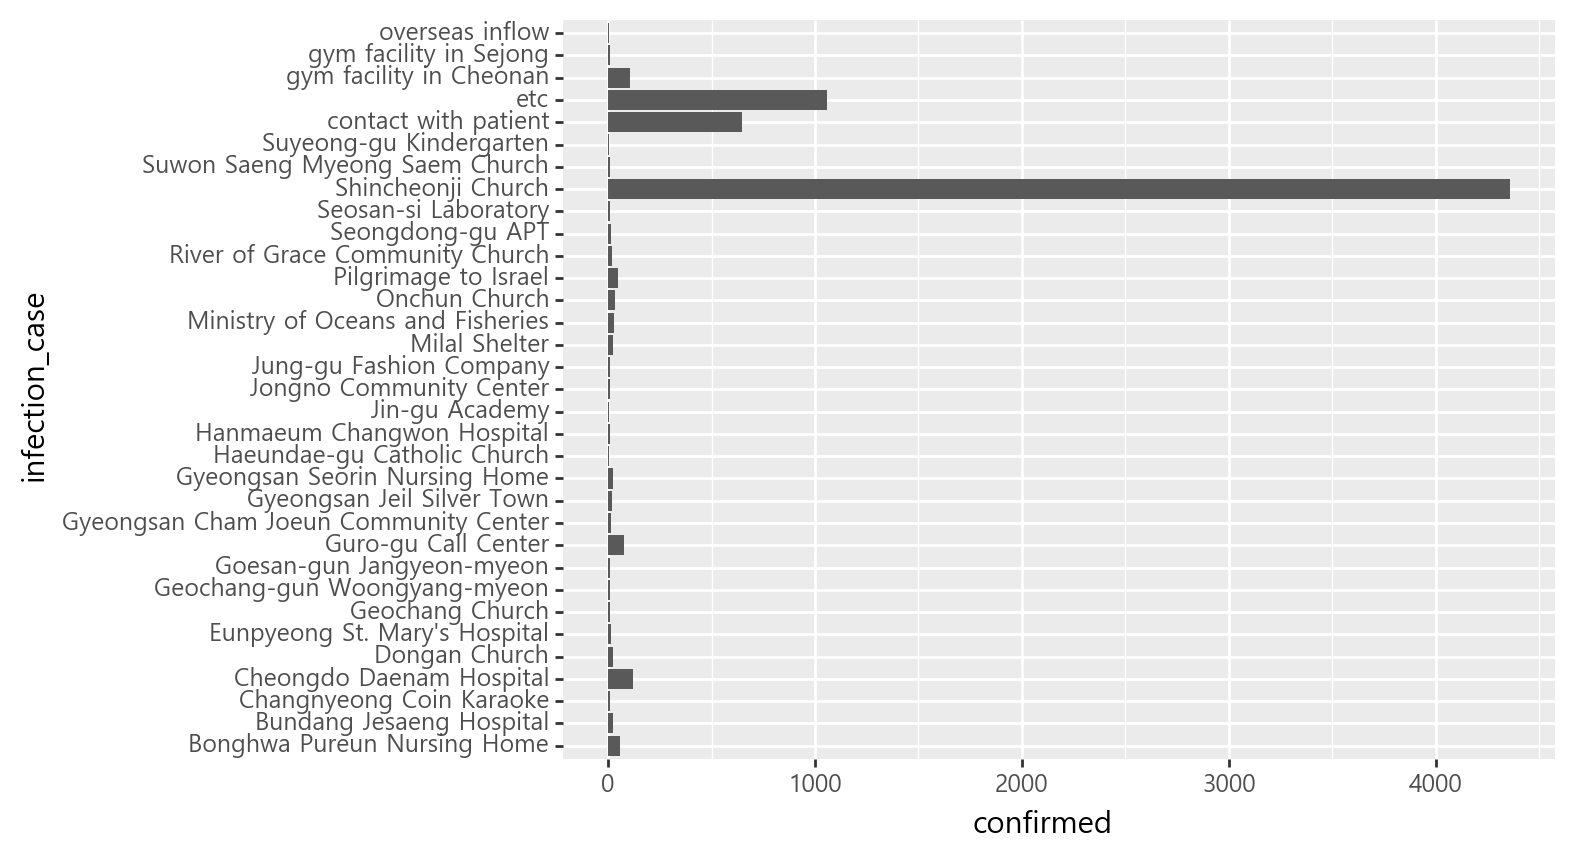

<ggplot: (-9223371889628168290)>

In [49]:
# 집단 감염된 케이스에 따른 확진자 수 시각화
(ggplot(df_location)
 +aes(x='infection_case', y='confirmed') 
 +geom_bar(stat='identity', position='dodge')
 +coord_flip()
 +theme(text=element_text(family="Malgun Gothic"))
)

# Weather csv 살펴보기

In [55]:
'''
1. code - region에 있는 지역코드
2. province - 특별시, 광역시, 도
3. data - yyyy-mm-dd 형식으로 되어있음
4. avg_temp - 평균온도
5. min_temp - 최저 온도
6. max_temp - 최고 온도
7. precipitation -  하루 강수량
8. max_wind_speed - 최대 풍속
9. most_wind_direction - 가장 많이 불었던 풍향(최빈, 각도로 나타낸듯)
10. avg_relative_humidity - 평균상대습도 (기온과 음의 관계)
Source of the weather data: KMA (Korea Meteorological Administration)
'''
weather.head()
weather_tail = weather.tail(70)
weather_tail

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
23305,70000,Jeju-do,2020-01-07,19.2,12.8,23.6,12.4,11.5,200.0,69.8
23306,70000,Jeju-do,2020-01-08,8.1,6.9,13.2,1.4,11.4,290.0,68.9
23307,70000,Jeju-do,2020-01-09,7.3,6.7,8.2,0.0,5.2,320.0,65.5
23308,70000,Jeju-do,2020-01-10,8.0,4.3,11.0,0.0,4.7,20.0,63.0
23309,70000,Jeju-do,2020-01-11,8.0,6.9,9.1,0.0,5.4,360.0,60.4
...,...,...,...,...,...,...,...,...,...,...
23370,70000,Jeju-do,2020-03-12,9.4,3.8,13.7,0.0,3.2,160.0,58.9
23371,70000,Jeju-do,2020-03-13,11.2,8.2,14.5,0.0,5.7,320.0,56.8
23372,70000,Jeju-do,2020-03-14,8.4,5.9,10.6,0.0,7.0,320.0,48.6
23373,70000,Jeju-do,2020-03-15,11.1,6.8,15.3,0.0,9.8,290.0,50.8


In [58]:
weather.shape

(23375, 10)

In [50]:
import seaborn as sns

# 코로나과 화두가 된 2020년 1월 달부터의 온도변화

Text(0.5, 1.0, '시간에 따른 기온변화')

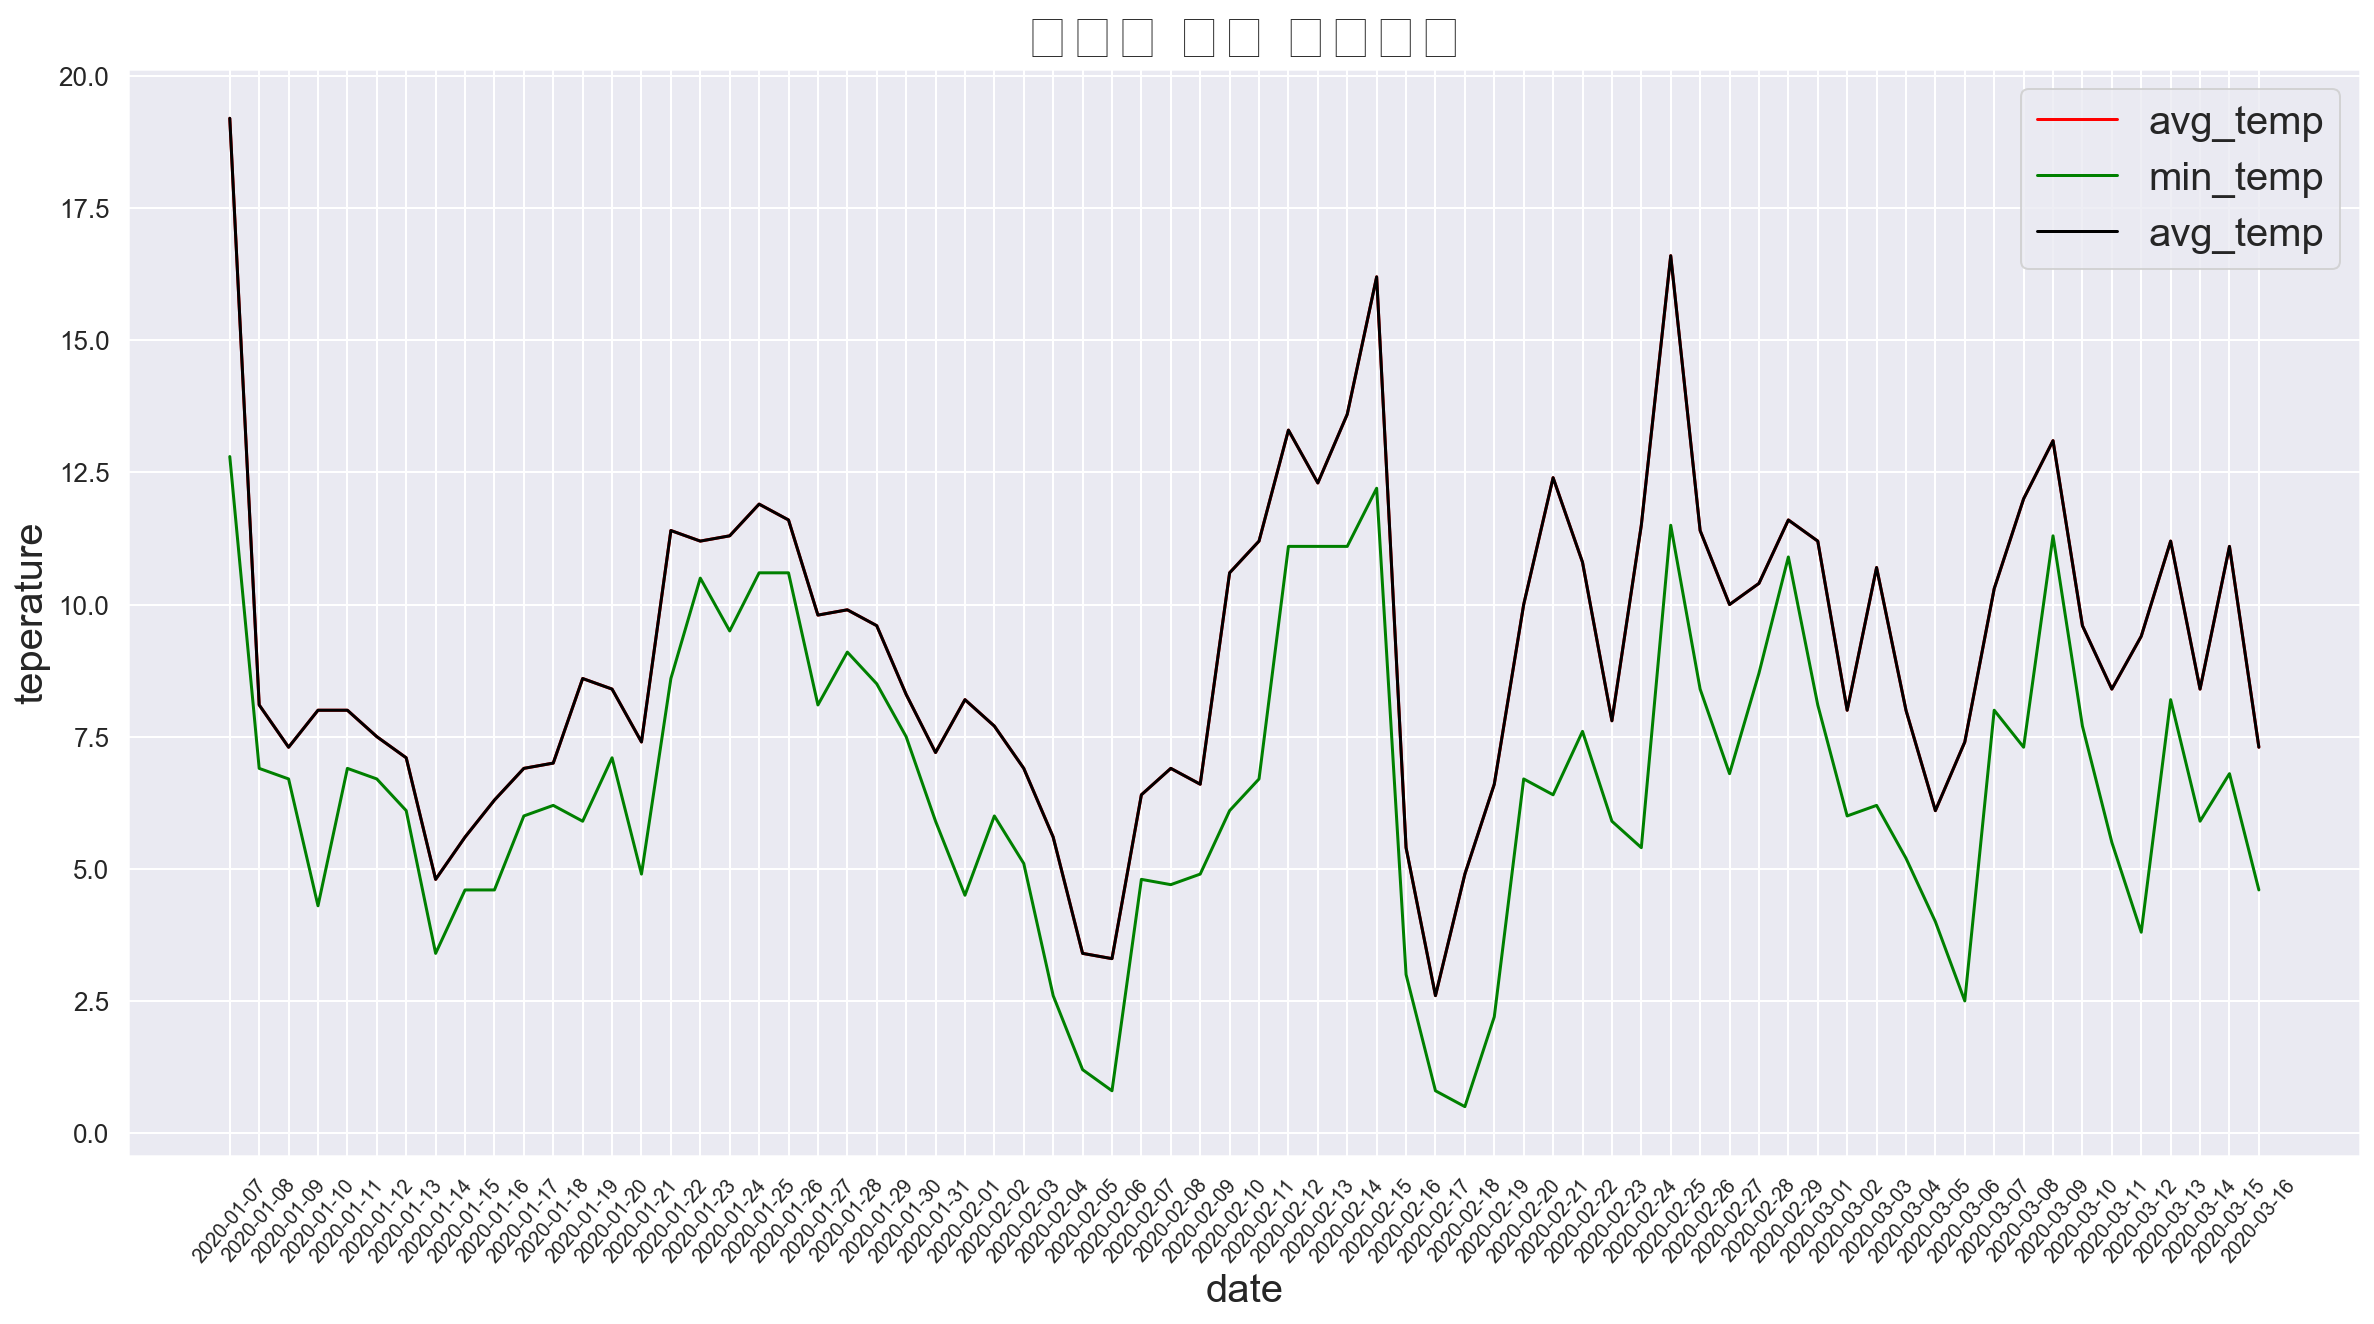

In [68]:

plt.figure(figsize=(20,10))
plt.plot(weather_tail['date'], weather_tail['avg_temp'], color='red')
plt.plot(weather_tail['date'], weather_tail['min_temp'], color='green')
plt.plot(weather_tail['date'], weather_tail['avg_temp'], color='black')
plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.xlabel('date', fontsize=20)
plt.ylabel('teperature', fontsize=20)
plt.legend(['avg_temp','min_temp','avg_temp'], loc='best', fontsize=20)
plt.title('시간에 따른 기온변화', size=30)

# 코로나과 화두가 된 2020년 1월 달부터의 온도-습도 그래프

Text(0.5, 1.0, '온도와 습도의 관계')

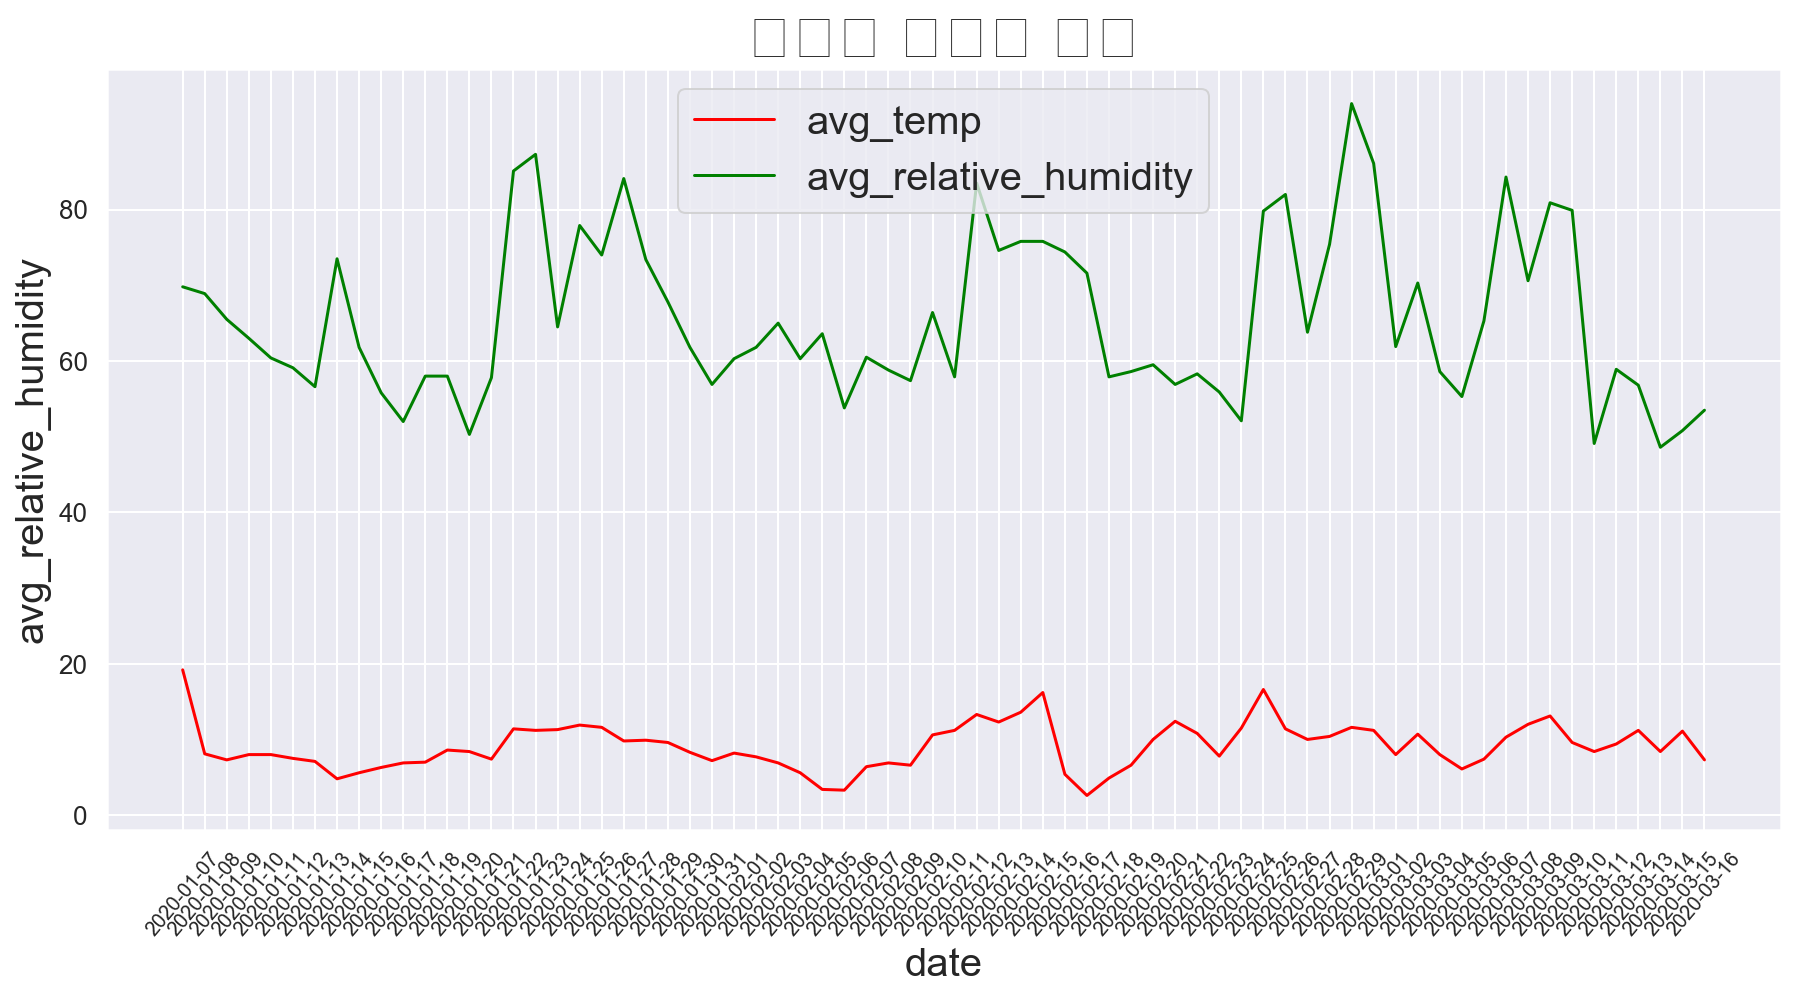

In [61]:
plt.figure(figsize=(15,7))
plt.plot(weather_tail['date'], weather_tail['avg_temp'], color='red')
plt.plot(weather_tail['date'], weather_tail['avg_relative_humidity'], color='green')

plt.xticks(rotation=50, size=10)
plt.yticks(size=13)
plt.xlabel('date', fontsize=20)
plt.ylabel('avg_relative_humidity', fontsize=20)
plt.legend(['avg_temp','avg_relative_humidity'], loc='best', fontsize=20)
plt.title('온도와 습도의 관계', size=30)